# Random Forest and Isolation Forest Analysis of Bank Customer Churn

## 1.0 Business understanding

### 1.1 Business objective

### 1.2 Situational assessment

* Customer churn is a problem in many businesses, including banking.
* Banks need ways to identify customers at risk of leaving.
* Analysis of banking customer data provides an opportuntity to identify customers at risk of leaving.
* Providing bank decision makers with insights extracted from the customer data can create opportunities to mitigate customer churn.

**Research Question #1:**
Are there key factors that contribute to banking customer churn?

**Hypothesis Couplet**

Null Hypothesis (H<sub>0</sub>): There are no key factors that contribute to banking customer churn?


Alternate Hypothesis (H<sub>1</sub>): There are key factors that contribute to banking customer churn?


## 2.0 Data Understanding

### 2.1 Prelimary data analysis

#### 2.1.1 Data mining goals

#### 2.1.2 Import libraries

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
import itertools
import graphviz
import warnings

In [333]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import silhouette_score as ss
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mlxtend.plotting import plot_decision_regions
from google.colab import files
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, IsolationForest

#### 2.1.3 Suppress warnings

In [334]:
warnings.filterwarnings('ignore')

#### 2.1.4 Data ingestion

In [335]:
# Import dataset
#create 2-dimensional dataFrames from a imported data.
#Choose the local file (baseball.csv).
#NOTE: YOU WILL NEED TO ALLOW THIRD-PARTY COOKIES FROM THIS SITE colab.research.google.com
from google.colab import files
uploaded = files.upload()

Saving Churn_Modeling.csv to Churn_Modeling (4).csv


In [336]:
file_name = "Churn_Modeling.csv"

In [337]:
# Load dataset
df=pd.read_csv(file_name)
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 2.1.5 Data description

**High Level Data Dictionary**

* RowNumber: Row Numbers from 1 to 10000
* CustomerId: Unique Ids for bank customer identification
* Surname: Customer's last name
* CreditScore: Credit score of the customer
* Geography: The country from which the customer belongs
* Gender: Male or Female
* Age: Age of the customer
* Tenure: Number of years for which the customer has been with the bank
* Balance: Bank balance of the customer
* NumOfProducts: Number of bank products the customer is utilising
* HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not
* IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not
* EstimatedSalary: Estimated salary of the customer in Dollars
* Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [338]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [339]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [340]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### 2.2 Data quality

#### 2.2.1 Check for missing values

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no missing values.

#### 2.2.2 Check for outliers

In [342]:
feature_df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'], axis=1)

In [343]:
rows, cols = 3, 2
num_columns = len(feature_df.columns)
num_plots = min(rows * cols, num_columns)

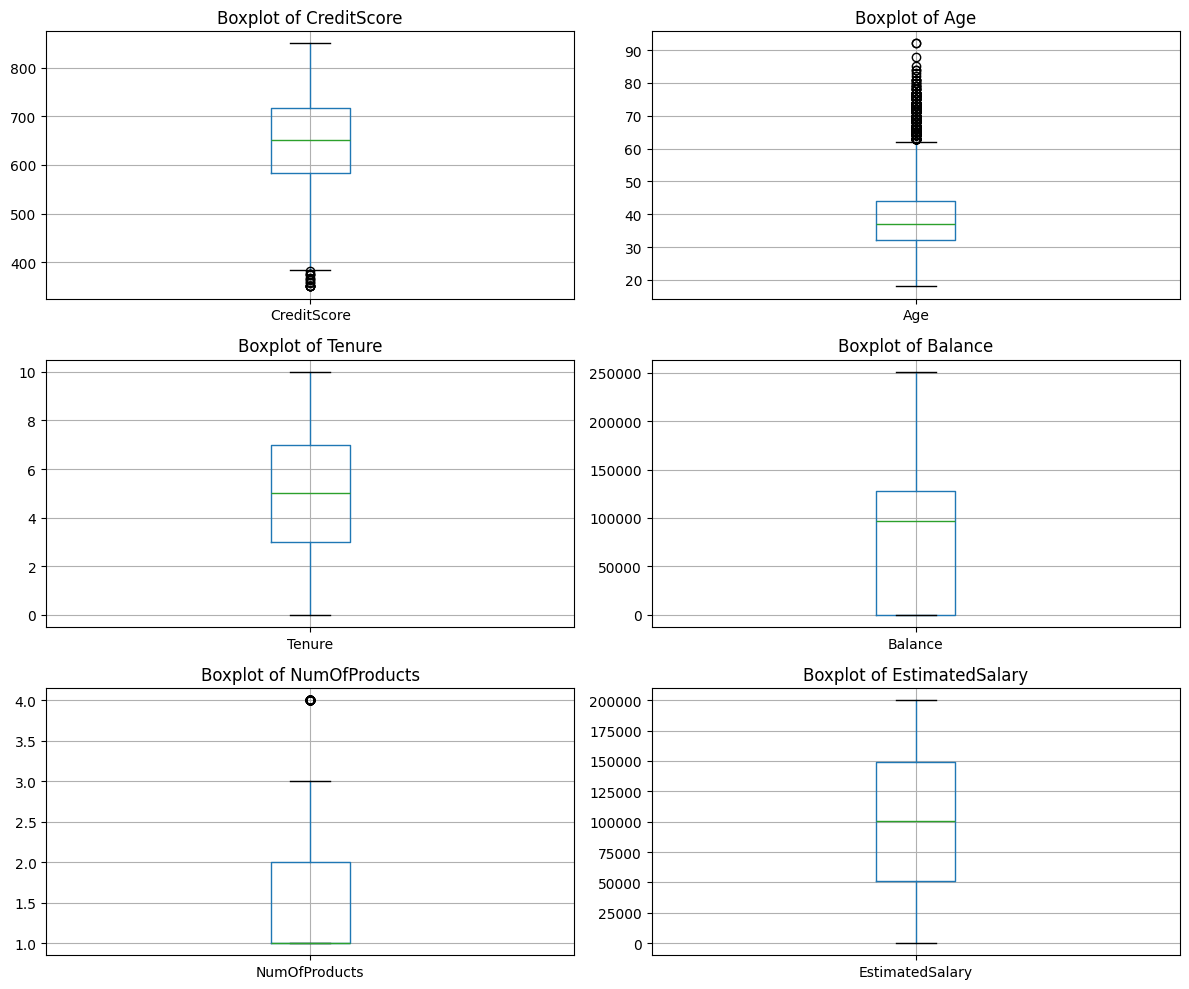

In [344]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    feature_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Credit score had low outliers, age has high outliers, and four products is an outlier.

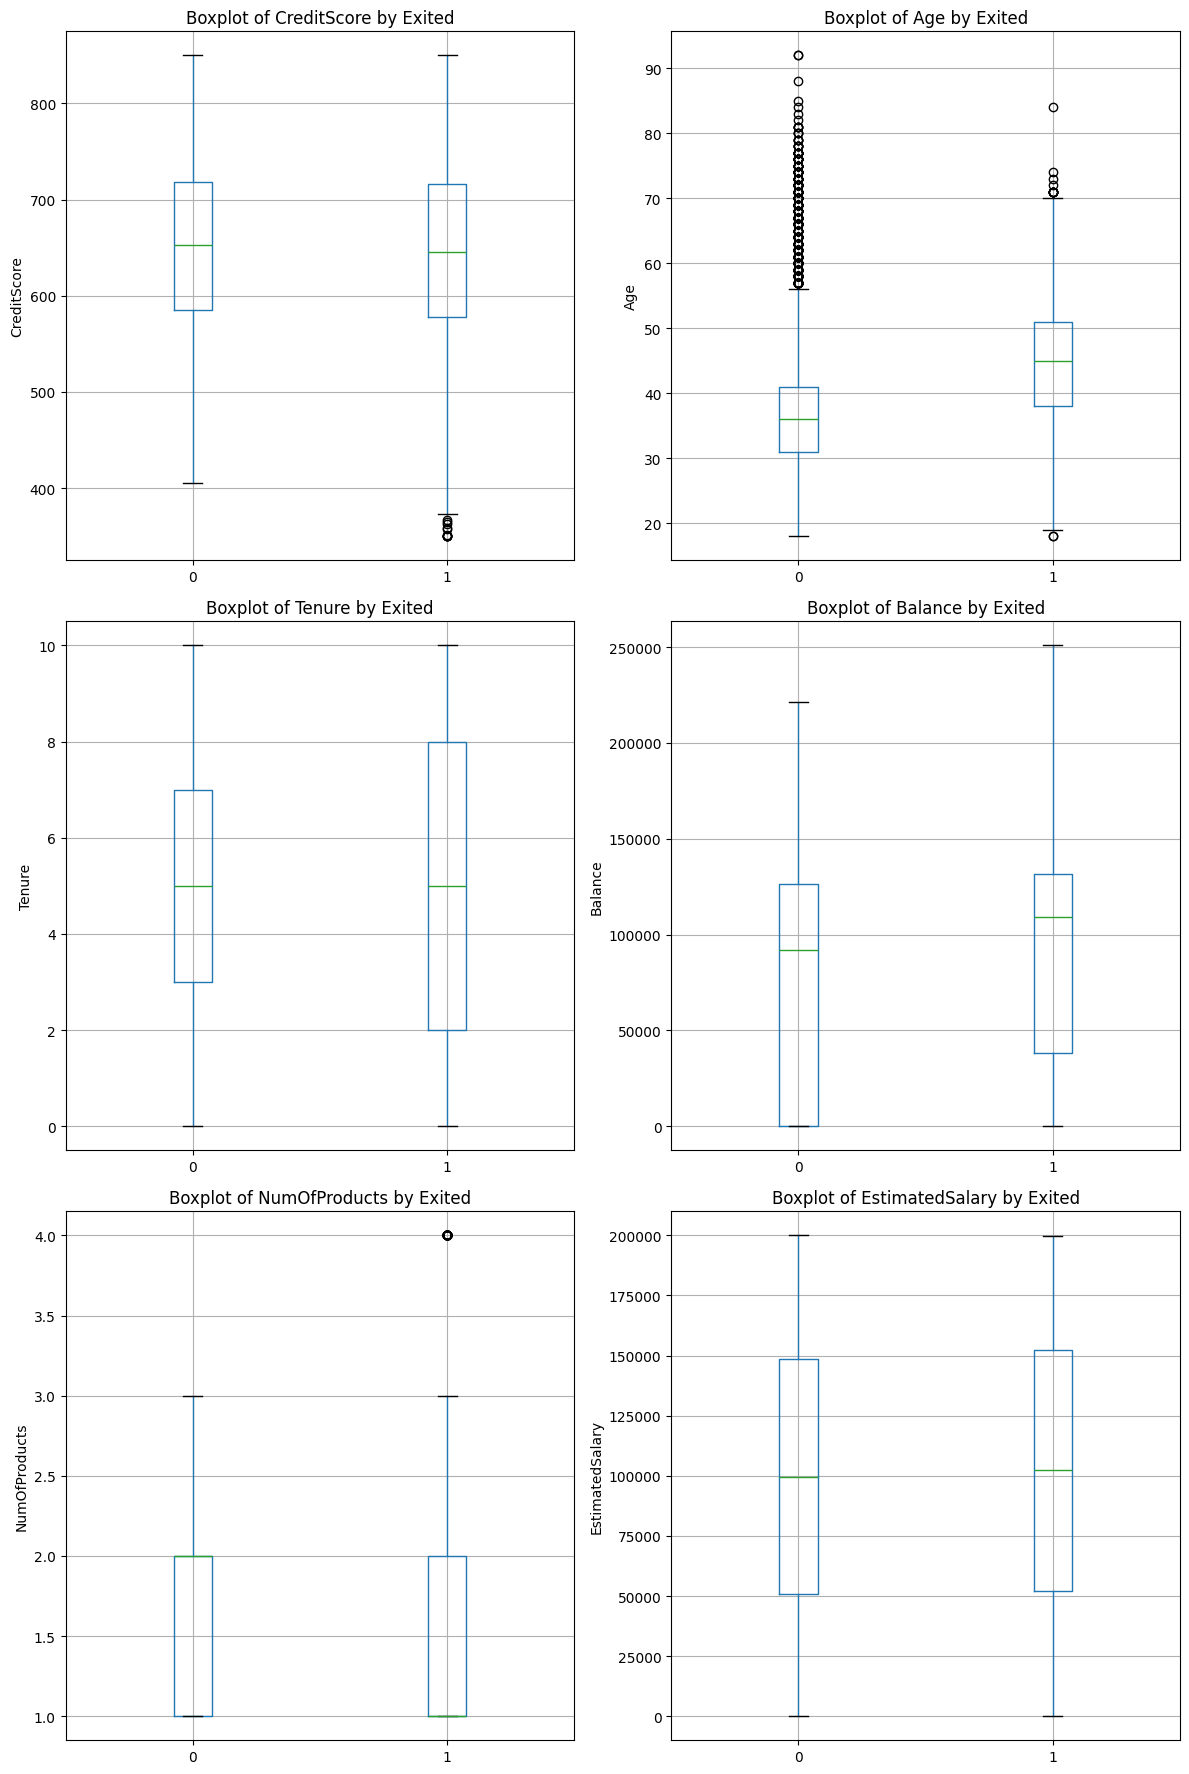

In [345]:
rows, cols = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 18))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    df.boxplot(column=column, by='Exited', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Exited')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(column)

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

fig.suptitle('')
plt.tight_layout()
plt.show()

#### 2.2.3 Check for duplicates

In [346]:
df.duplicated().sum()

np.int64(0)

There are no duplicate rows.

### 2.3 Exploratory data analysis

#### 2.3.1 Check distributions of numeric variables

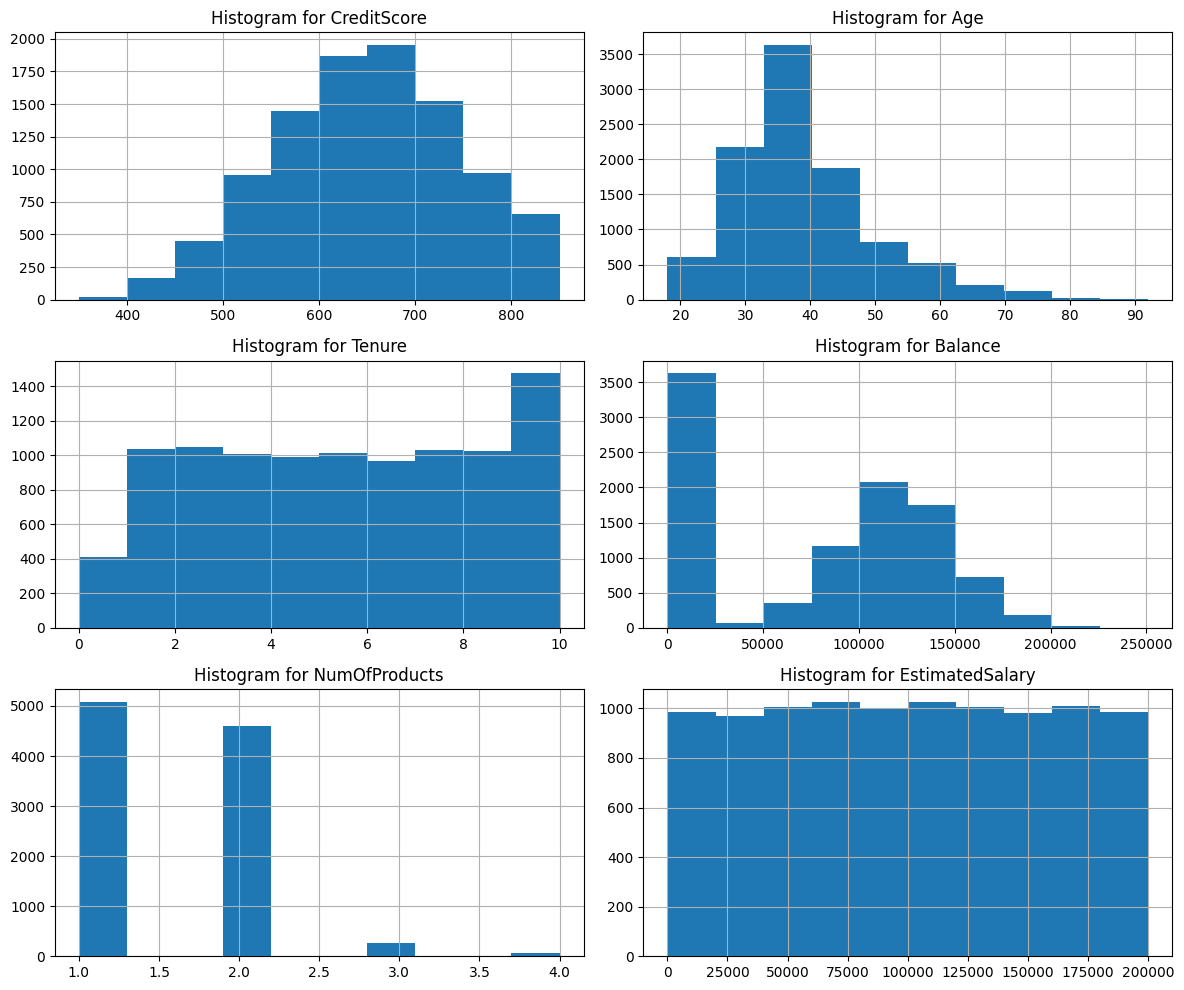

In [347]:
rows, cols = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    feature_df.hist(column=column, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

All but three numeric variables have skewed distributions.

#### 2.3.2 Check density of numeric variables

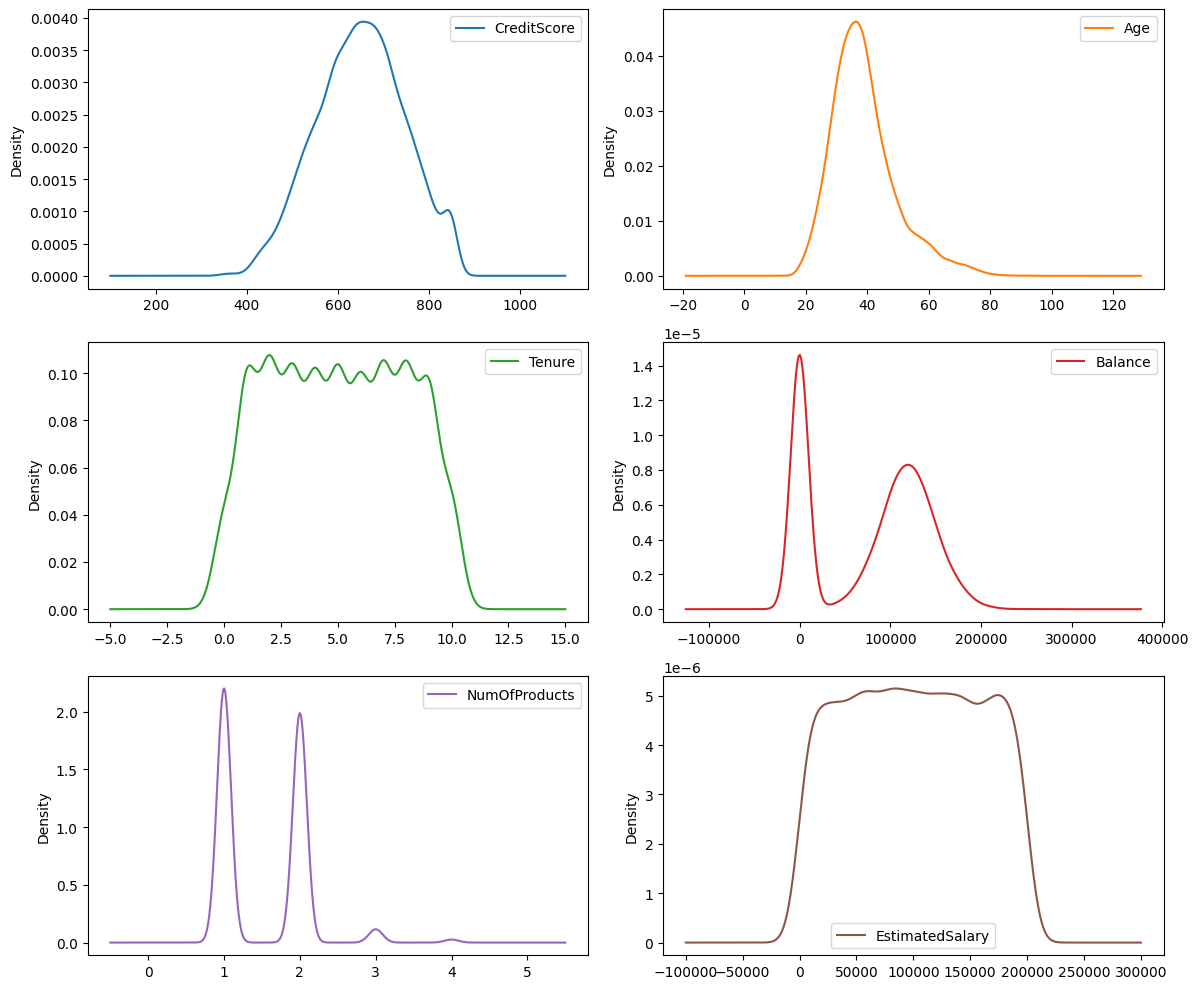

In [348]:
feature_df.plot(kind='density', subplots=True, layout=(3,2), figsize=(12,10), sharex=False)
plt.tight_layout()
plt.show()

#### 2.3.3 Check skewness of continuous numeric variables

In [349]:
num_cols = ['CreditScore','Age', 'Balance', 'EstimatedSalary']

In [350]:
df[num_cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
Balance,-0.141109
EstimatedSalary,0.002085


Age is skewed right due to the high number of outliers.

#### 2.3.3 Check corrleations of numeric variables

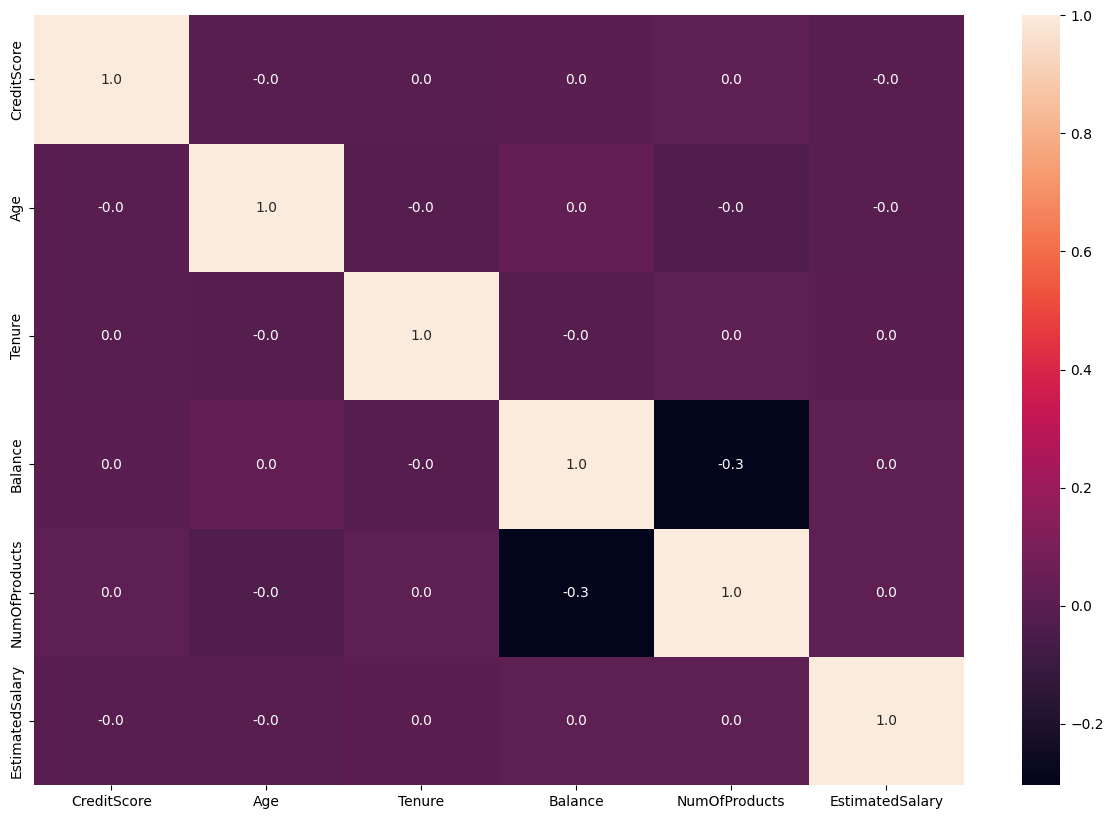

In [351]:
plt.figure(figsize=[15,10],facecolor='white')
sns.heatmap(feature_df.corr(), annot=True, fmt=".1f")
plt.show()

None of the features are correlated.

#### 2.3.4 Count of churned customers

In [352]:
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


#### 2.3.5 Customers churned by categorical feature

In [353]:
def cust_churn_cat(column):
  plt.figure(figsize=(12,6))
  ax = sns.countplot(x=column, hue='Exited', data=df)
  for val in ax.containers:
    ax.bar_label(val)
  plt.title(f'Customers Churned by {column}')
  plt.show()

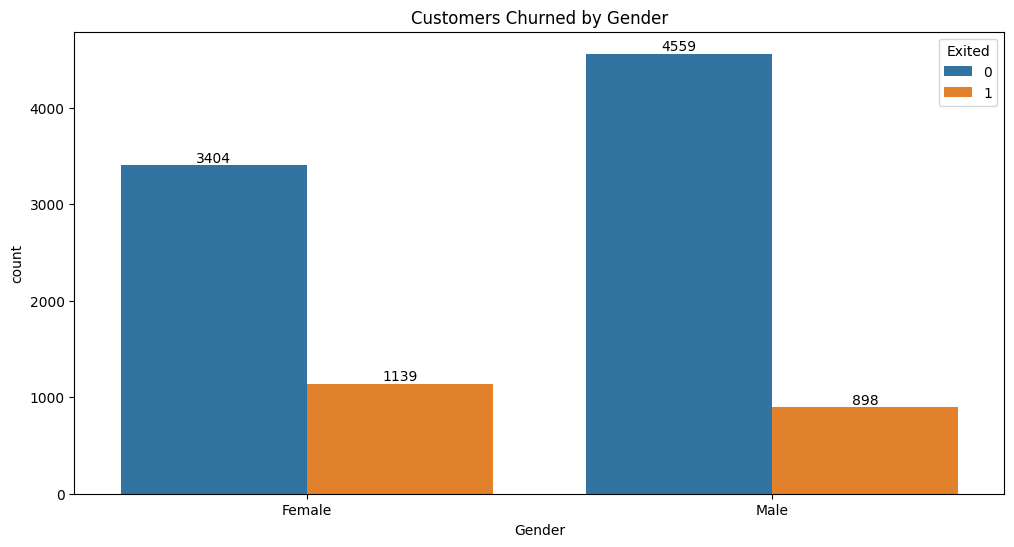

In [354]:
cust_churn_cat('Gender')

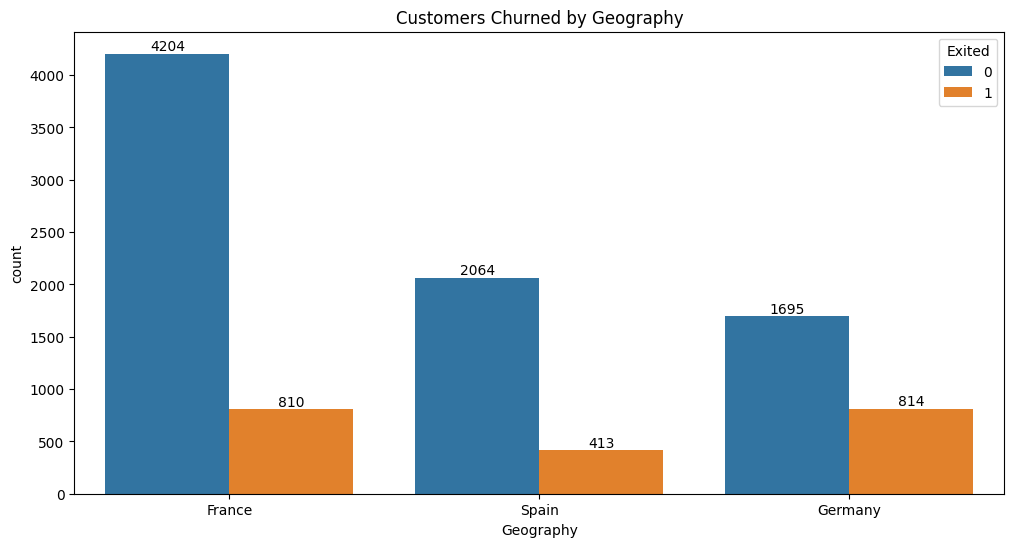

In [355]:
cust_churn_cat('Geography')

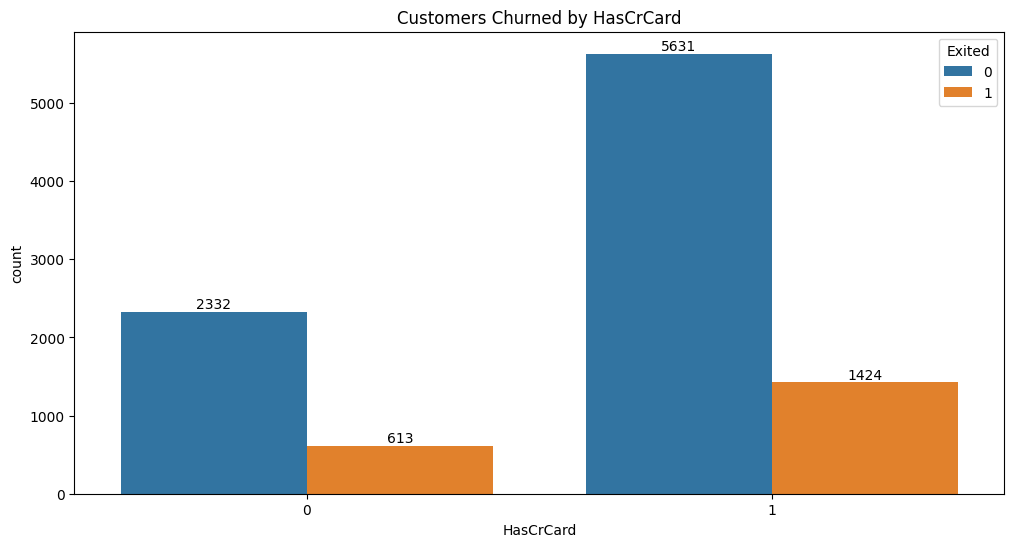

In [356]:
cust_churn_cat('HasCrCard')

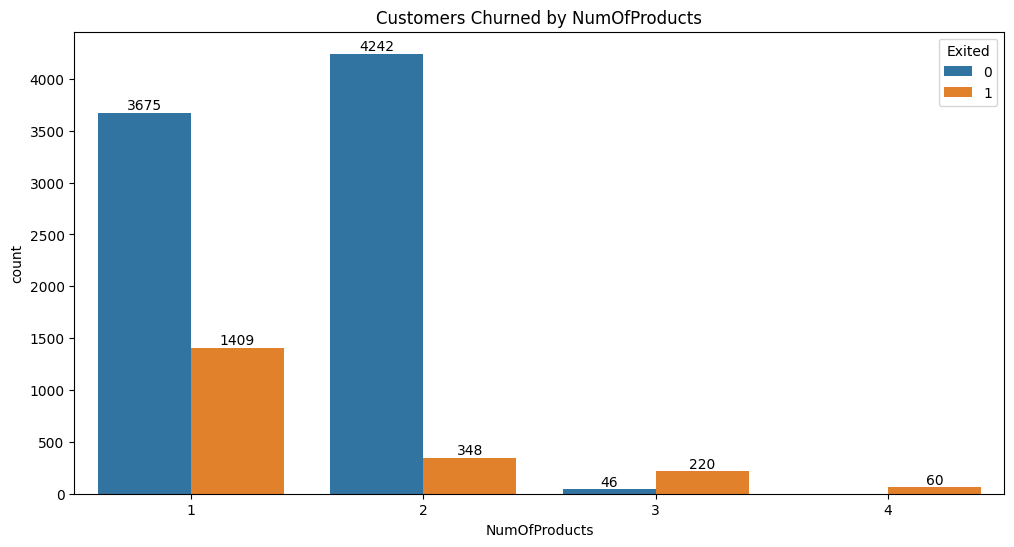

In [357]:
cust_churn_cat('NumOfProducts')

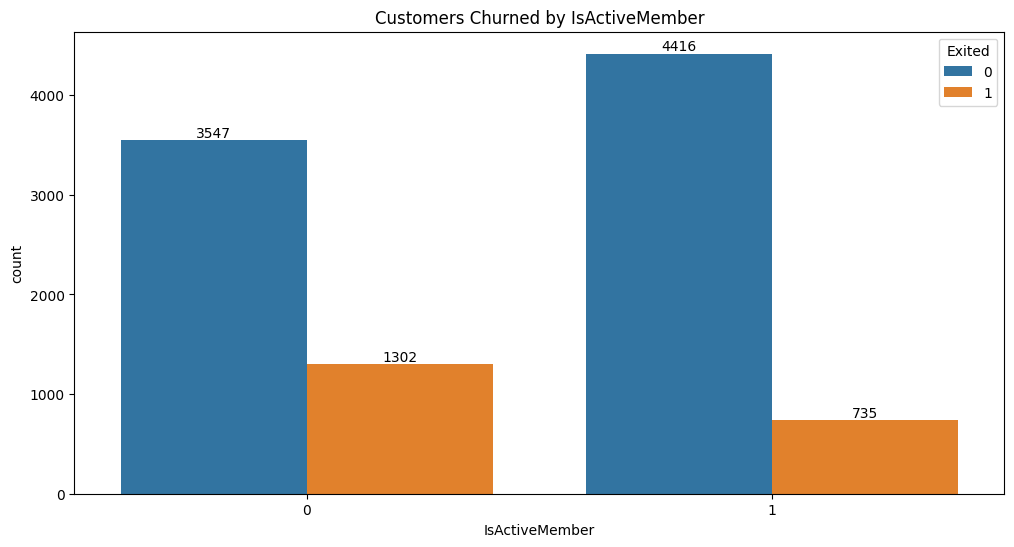

In [358]:
cust_churn_cat('IsActiveMember')

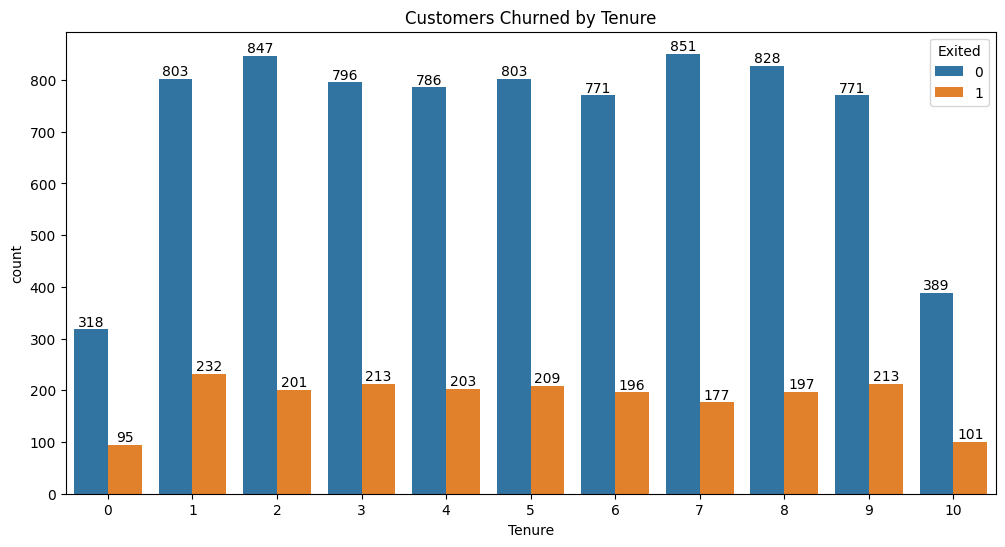

In [359]:
cust_churn_cat('Tenure')

#### 2.3.6 Customers churned by numerical feature

In [360]:
def cust_churn_num(column):
  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  sns.histplot(x=column, hue='Exited', data=df)
  plt.title(f'Distribution of {column} by Churn Status')

  plt.subplot(1,2,2)
  sns.boxplot(x='Exited', y=column, data=df)
  plt.title(f'Distribution of {column} by Churn Status')

  plt.tight_layout()
  plt.show()

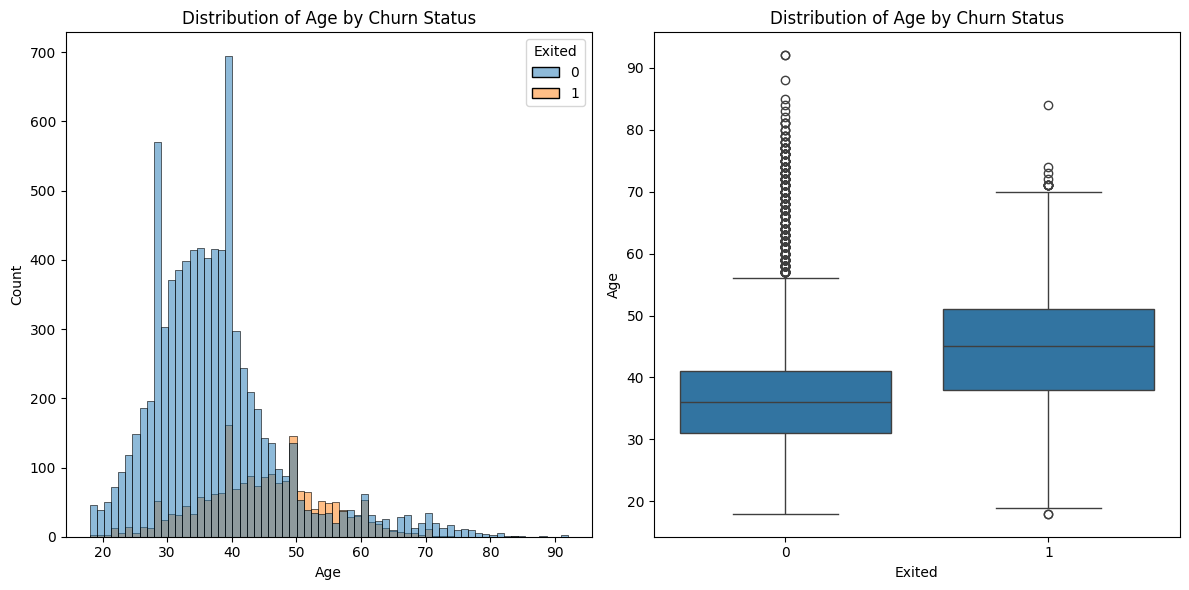

In [361]:
cust_churn_num('Age')

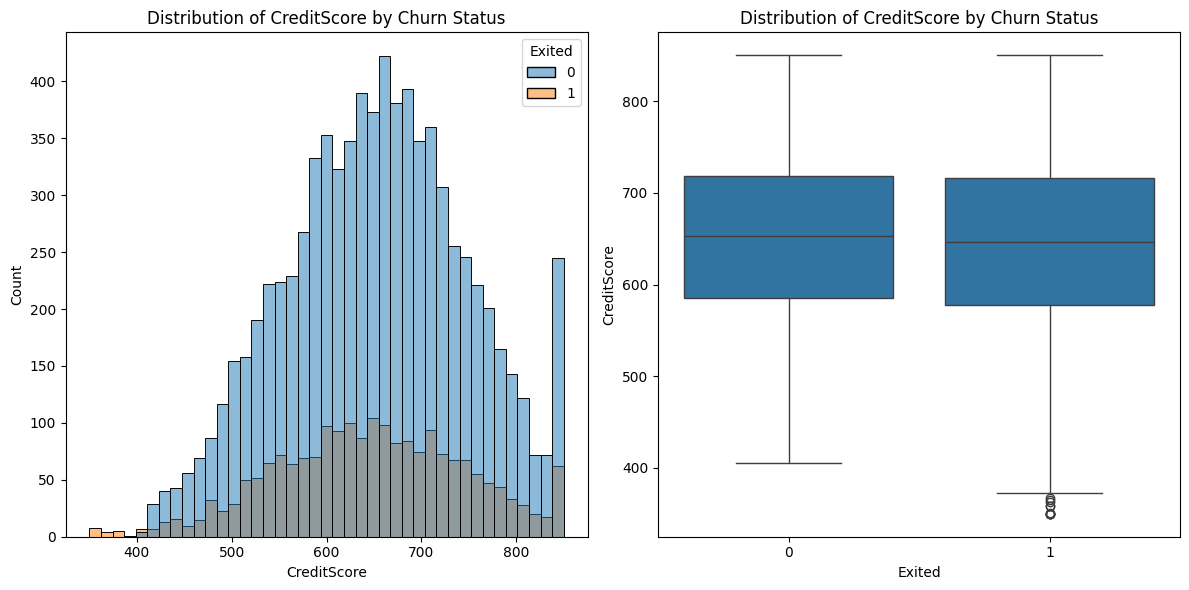

In [362]:
cust_churn_num('CreditScore')

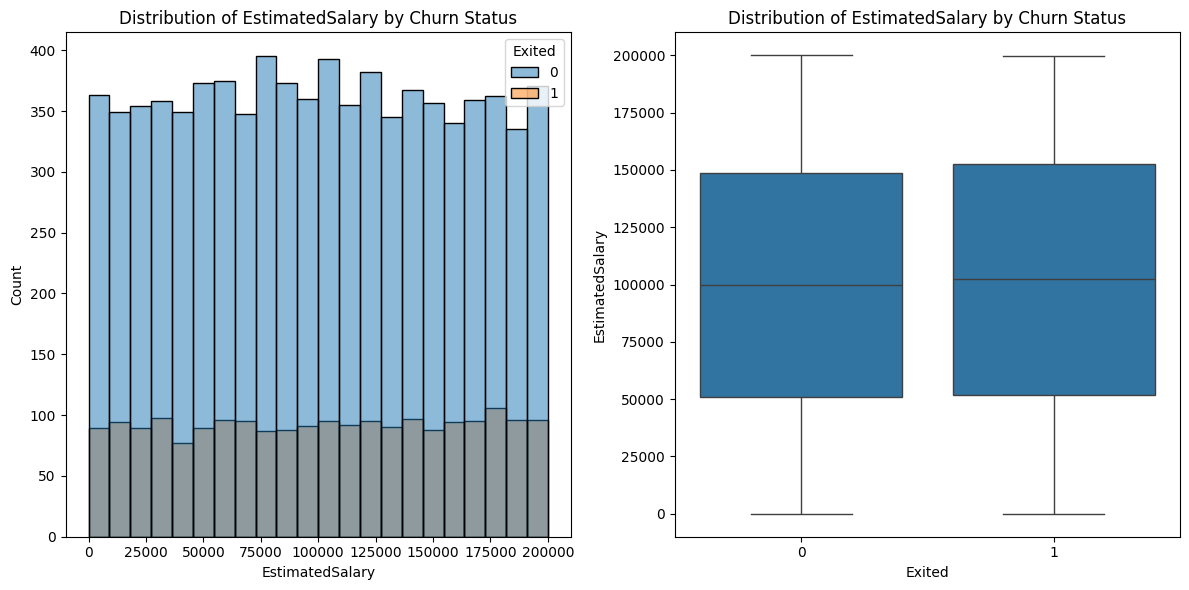

In [363]:
cust_churn_num('EstimatedSalary')

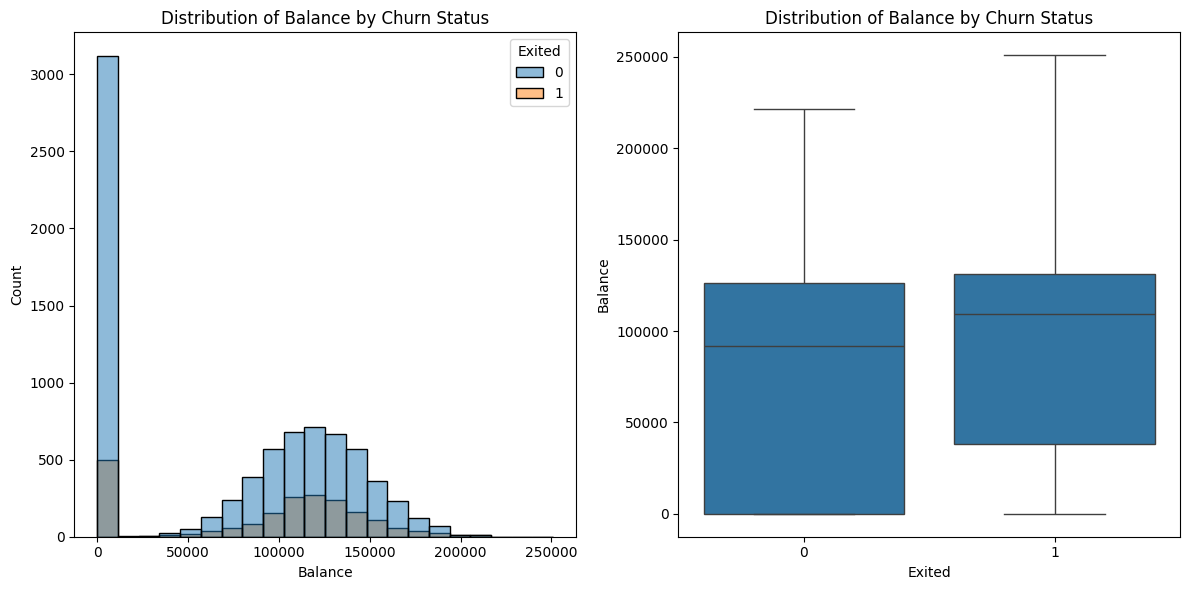

In [364]:
cust_churn_num('Balance')

## 3.0 Data preprocessing

### 3.1 Data cleansing

#### 3.1.1 No missing values

#### 3.1.2 No duplicate rows

#### 3.1.3 No highly correlated features

#### 3.1.4 Drop unnecceary columns

In [365]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

### 3.2 Feature engineering

#### 3.2.1 Create categorical variables

In [366]:
cat_cols = ['Geography', 'Gender']

In [367]:
df = pd.get_dummies(columns=cat_cols, data=df)

In [368]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [369]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


#### 3.2.1 Log transform of age

In [370]:
prior_age = df["Age"]

In [371]:
df["Age"] = np.log(df["Age"])

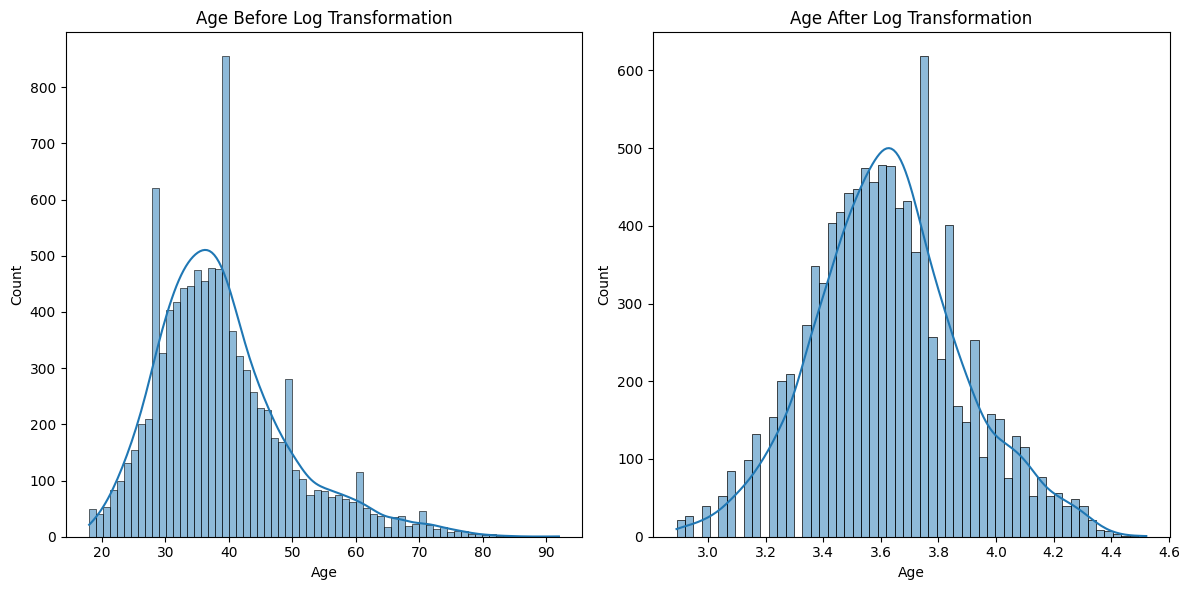

In [372]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(x=prior_age, kde=True)
plt.title("Age Before Log Transformation")

plt.subplot(1,2,2)
sns.histplot(x=df["Age"], kde=True)
plt.title("Age After Log Transformation")

plt.tight_layout()
plt.show()

### 3.3 Data partitioning

In [373]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [375]:
print("Shape of x_train is:",X_train.shape)
print("Shape of x_test is: ",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 13)
Shape of x_test is:  (2000, 13)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


### 3.4 Data transformation

#### 3.4.1 Scale numeric variables

In [376]:
scaler = StandardScaler()

In [377]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.058568  ,  1.60512039,  0.68472287, ..., -0.57773517,
        -0.90750738,  0.90750738],
       [ 0.91362605, -0.62851171, -0.6962018 , ..., -0.57773517,
        -0.90750738,  0.90750738],
       [ 1.07927399, -0.06680278, -1.73189531, ..., -0.57773517,
         1.10191942, -1.10191942],
       ...,
       [ 0.16821031, -0.06680278,  1.3751852 , ..., -0.57773517,
         1.10191942, -1.10191942],
       [ 0.37527024, -0.28180243,  1.02995403, ...,  1.73089688,
        -0.90750738,  0.90750738],
       [ 1.56586482,  1.17478861,  0.68472287, ...,  1.73089688,
        -0.90750738,  0.90750738]])

In [378]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.66718803, -0.16229333,  0.69686459, ..., -0.55809982,
        -0.93228691,  0.93228691],
       [-1.28654133, -0.49946924, -0.34712731, ..., -0.55809982,
        -0.93228691,  0.93228691],
       [-0.95621957,  0.24598692, -0.34712731, ...,  1.79179416,
         1.07263117, -1.07263117],
       ...,
       [-1.37944433,  0.87091362,  1.39285919, ..., -0.55809982,
         1.07263117, -1.07263117],
       [ 0.4063577 ,  0.14787843,  0.69686459, ..., -0.55809982,
        -0.93228691,  0.93228691],
       [ 1.03603357, -0.49946924, -1.0431219 , ..., -0.55809982,
        -0.93228691,  0.93228691]])

#### 3.4.2 Reduce class imbalance

In [379]:
smt = SMOTE(random_state=42)

In [380]:
X_train_balance,y_train_balance = smt.fit_resample(X_train,y_train)

In [381]:
print(X_train_balance.shape ,y_train_balance.shape)

(12740, 13) (12740,)


In [382]:
y_train_balance.value_counts().to_frame()

,count
Exited,
1,6370
0,6370


#### 3.4.3 Random forest grid search with cross validation

In [383]:
rfc = RandomForestClassifier()

In [384]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [385]:
grid_search = RandomizedSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

In [386]:
grid_search.fit(X_train_balance,y_train_balance)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [50, 70, 90, 100]})

In [387]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

Best Parameters for RandomForest Model is:




{'n_estimators': 70,
 'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_depth': 8,
 'criterion': 'gini'}

## 4.0 Modeling

### 4.1 Random forest model with best parameters

In [392]:
rfc1 = RandomForestClassifier(**best_parameters)

rfc1.fit(X_train_balance,y_train_balance)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=70)

### 4.2 Isolation forest model

In [414]:
iforest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iforest.fit(X_train)
anomaly_preds = iforest.predict(X_test)

## 5.0 Evaluation

### 5.1 Random forest evaluation

In [393]:
y_train_pred1 = rfc1.predict(X_train_balance)
y_test_pred1  = rfc1.predict(X_test)

In [394]:
print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_balance,y_train_pred1)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred1)*100,2),"%")

Accuracy Score of Model on Training Data is => 85.16 %
Accuracy Score of Model on Testing Data  is => 61.75 %


In [395]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred1,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred1,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred1,average="micro"))

F1 Score of the Model is => 0.6175
Recall Score of the Model is => 0.6175
Precision Score of the Model is => 0.6175


In [396]:
X_train_scaled = pd.DataFrame(X_train, columns=df.drop(columns=["Exited"]).columns)

In [397]:
imp_df = pd.DataFrame({"Feature Name":X_train_scaled.columns,
                       "Importance":rfc1.feature_importances_})

In [398]:
features = imp_df.sort_values(by="Importance",ascending=False)

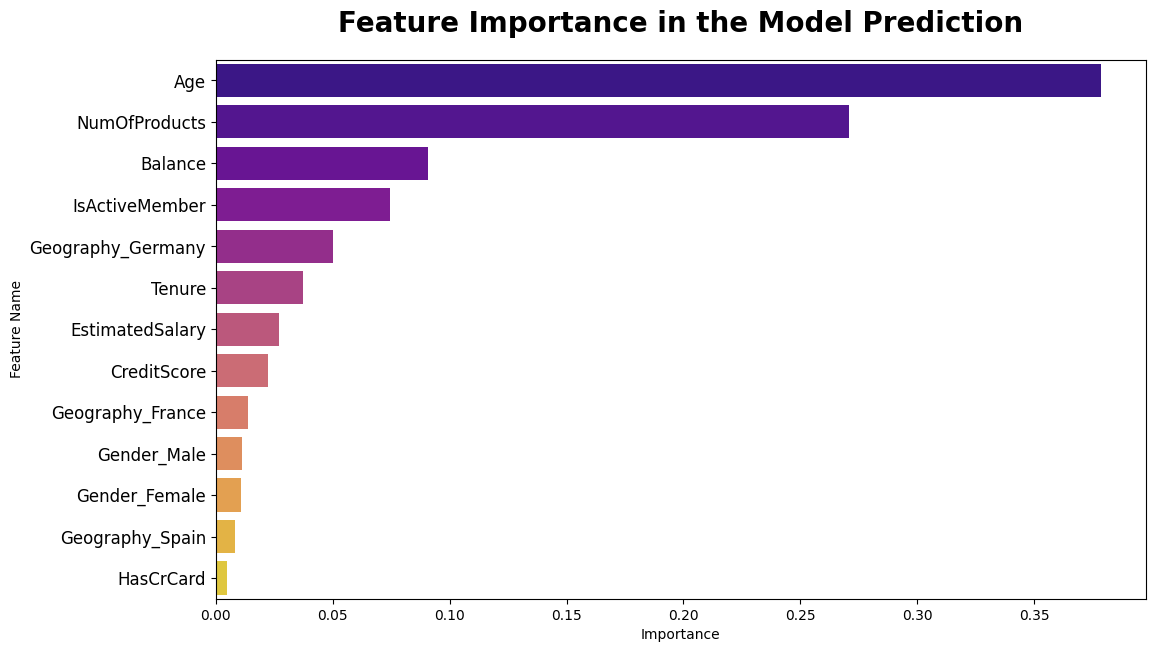

In [399]:
plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

In [400]:
cm = confusion_matrix(y_test,y_test_pred1)

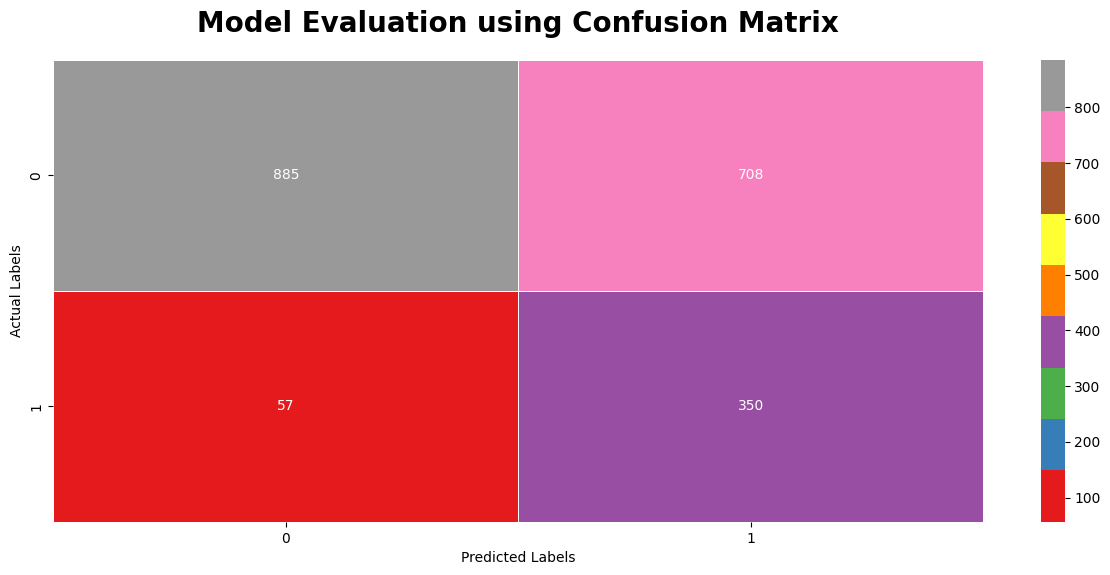

In [401]:
plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [402]:
y_pred_proba1 = rfc1.predict_proba(X_test)[:][:,1]

In [403]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index

In [404]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba1)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba1)

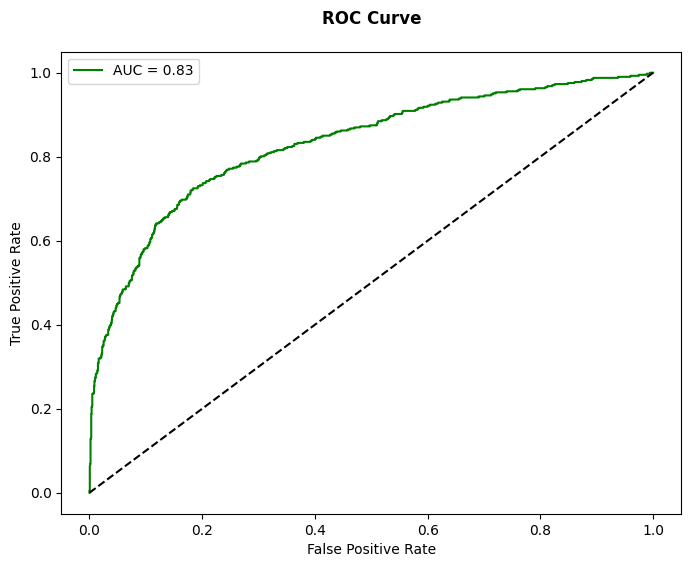

In [405]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

### 5.2 Isolation forest evaluation

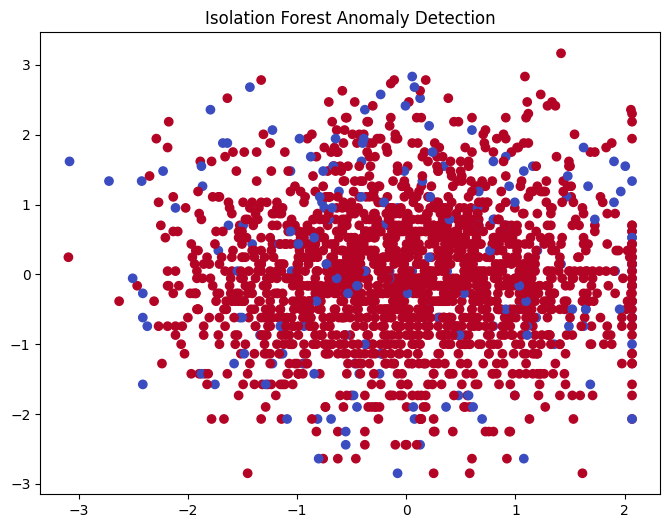

In [416]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=anomaly_preds, cmap='coolwarm')
plt.title('Isolation Forest Anomaly Detection')
plt.show()

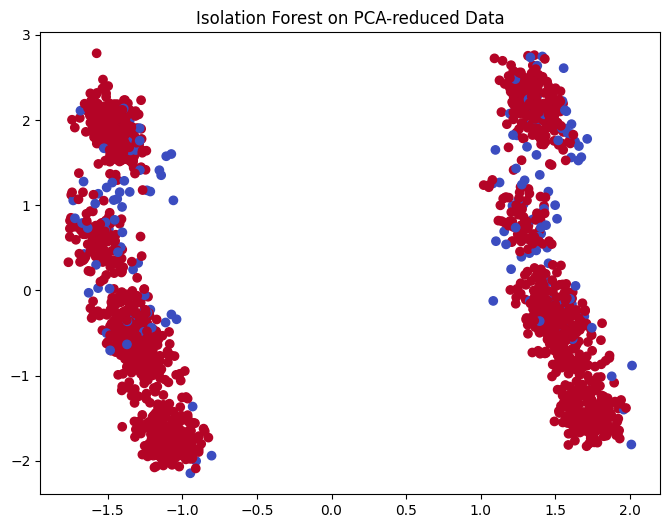

In [417]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=anomaly_preds, cmap='coolwarm')
plt.title('Isolation Forest on PCA-reduced Data')
plt.show()

In [418]:
anomaly_preds = iforest.predict(X_test)  # 1 = normal, -1 = anomaly

In [419]:
anomaly_binary = np.where(anomaly_preds == -1, 1, 0)  # 1 = anomaly, 0 = normal

In [423]:
cm2 = confusion_matrix(y_test, anomaly_binary)

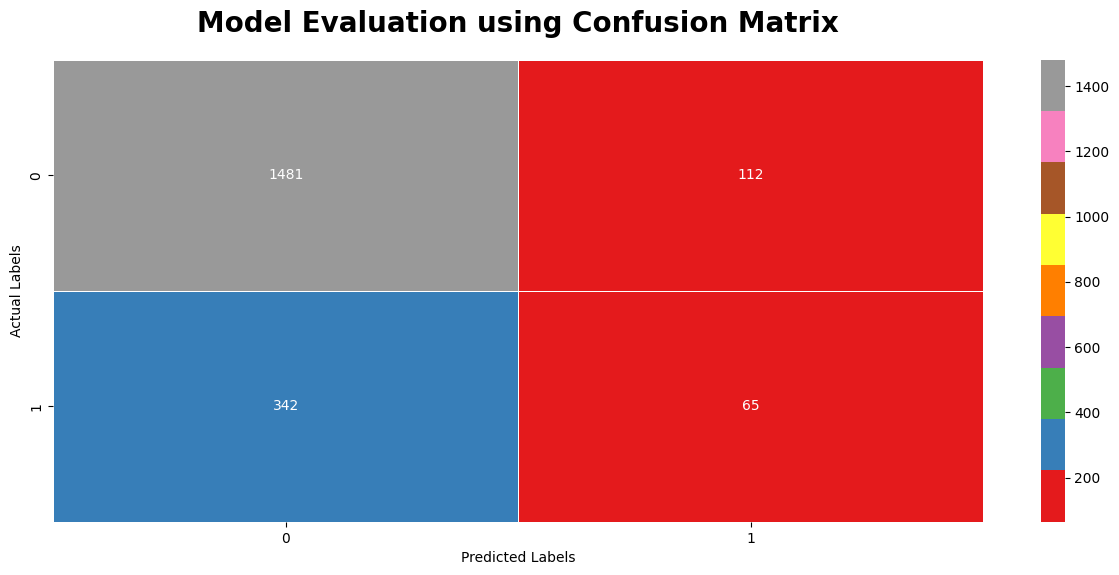

In [424]:
plt.figure(figsize=(15,6))
sns.heatmap(data=cm2, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [425]:
accuracy = accuracy_score(y_test, anomaly_binary)
precision = precision_score(y_test, anomaly_binary)
recall = recall_score(y_test, anomaly_binary)
f1 = f1_score(y_test, anomaly_binary)

In [426]:
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))

Accuracy: 0.773
Precision: 0.367
Recall: 0.16
F1 Score: 0.223


## 6.0 Deployment

Paper: ComfortJDDS8536-3 - Random Forest and Isolation Forest Analysis of Bank Customer Churn